# Encrypter
Di seguito viene proposto il programma che permette di criptare delle immagini attraverso l'utilizzo della formica di Langton.

In questa sezione vengono importate le librerie necessarie per la manipolazione delle immagini e le funzioni contenute in Algorithm.ipynb.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import json
from IPython.display import display, Markdown
%run Algorithm.ipynb

Questa funzione si occupa di criptare l'immagine, basandosi sulla matrice, gli step e il valore di soglia passati.
Restituisce, oltre alla matrice criptata, gli ultimi valori di direzione e posizione della formica.

In [23]:
def langton_ant_encrypter(grid, steps, threshold):
    direction = 0  # Direzione iniziale della formica (0: su, 1: destra, 2: giù, 3: sinistra)
    x, y = grid.shape[0] // 2, grid.shape[1] // 2  # Posizione iniziale della formica al centro della griglia

    for i in range(steps):
        grid, x, y, direction = ant_step(grid, x, y, direction, threshold)
    return grid, direction, x, y

Questa sezione del codice si occupa di caricare l'immagine da criptare e di creare la matrice che la rappresenti. Per farlo utilizza valori da 0 a 255 per ogni cella, che rappresentano la scala di grigi.

In [24]:
image_name = input("Nome dell'immagine da criptare: ");
image_extension = input("Estensione: ");

image = plt.imread('images_original//' + image_name + "." + image_extension)

gray_image = np.mean(image, axis=2)

min_value = np.min(gray_image)
max_value = np.max(gray_image)
scaled_image = (gray_image - min_value) / (max_value - min_value)

grid_original = (scaled_image * 256).astype(int)

Di seguito viene mostrata l'immagine originale, la quale viene convertita in png, sulla base della matrice creata.

### Immagine originale

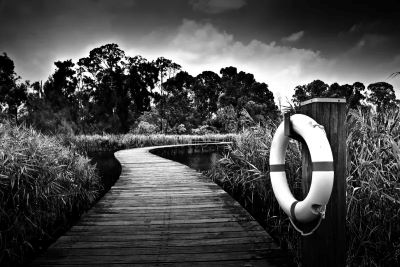

In [25]:
grid_normalized = ((grid_original - grid_original.min()) / (grid_original.max() - grid_original.min()) * 255).astype(np.uint8)
img_original = Image.fromarray(grid_normalized)

img_original.save("images_converted//" + image_name + ".png")

display(Markdown("### Immagine originale"))
display(img_original)

Di seguito viene caricata l'immagine convertita precedemente, che presenta una palette cromatica determinata dalle operazioni svolte in precedenza.

In [26]:
image = plt.imread('images_converted//' + image_name + ".png")

min_value = np.min(image)
max_value = np.max(image)
grid_converted = ((image - min_value) / (max_value - min_value) * 255).astype(int)

Di seguito è possibile impostare i parametri per la criptazione dell'immagine.

In [27]:
threshold = 128
steps = 50000000

In questa sezione viene richiamata la funzione che si occupa di criptare la matrice.

In [28]:
grid_encrypted, direction, x, y = langton_ant_encrypter(grid_converted.copy(), steps, threshold)

Di seguito vengono salvati i dati necessari a decriptare l'immagine all'interno di un file JSON.

In [29]:
decrypt_data = {
    "direction": direction,
    "position": (x, y),
    "steps": steps,
    "threshold": threshold
}

with open('images_encrypted//' + image_name + ".json", 'w') as file:
    json.dump(decrypt_data, file)

Questa sezione di codice mostra l'immagine criptata e la salva come png.

### Immagine criptata

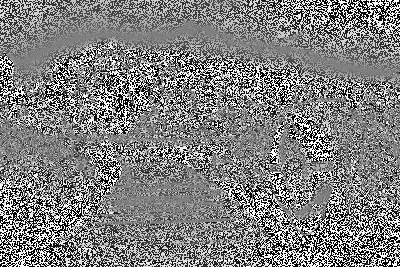

In [30]:
grid_normalized = ((grid_encrypted - grid_encrypted.min()) / (grid_encrypted.max() - grid_encrypted.min()) * 255).astype(np.uint8)

img_encrypted = Image.fromarray(grid_normalized)

img_encrypted.save("images_encrypted//" + image_name + ".png")

display(Markdown("### Immagine criptata"))
display(img_encrypted)